In [1]:
#Importing packages
using Plots;
using StatsBase;
using StatsPlots;
using Distributions;
using LinearAlgebra;
using LaTeXStrings;
using CSV;
using DataFrames;

**Sparse Matrix** 

A sparse matrix is a matrix which contains significant number of zeros as its elements. We can generate sparse matrices from different gaussian ensembles. To generate a sparse matrix from GOE/GUE, we can do the following steps:
-  Take a matrix A (which is either GOE or GUE) of dimension $N\times N$. Define $Q= \frac{N(N-1)}{2}$
-  Randomly choose a pair (i,j) from Uniform(1,N)
-  If i and j are unequal (that is, A[i,j] is not the diagonal entry) and A[i,j] is not zero, then set A[i,j] = A[j,i] = 0. Otherwise, choose (i,j) again
-  Repeat this P times where $P<Q$. This ensures that A has exactly $2P$ zeroes and hence is a sparse matrix for large values of P

In [3]:
function H_GOE(n)
    A=rand(Normal(0,1), n,n)
    Q=(A+transpose(A))/2
    Q
    end

H_GOE (generic function with 1 method)

In [4]:
#Defining a function to generate eigenvalues of a GUE matrix
function H_GUE(n)
    H=complex(zeros(n,n));
    for i = 1 : n
        for j = 1 : n
            H[i,j]=rand(Normal(0,1))+ rand(Normal(0,1))im
        end
    end
    #Making a hermitian matrix from H
    Hs=(H+H')/2
    Hs
    end

H_GUE (generic function with 1 method)

In [7]:
function generate_sparse(n,P,b)
    if(b==1)
        H=H_GOE(n)   
    elseif (b==2)
        H=H_GUE(n) 
    end
    for q =1:P
        i = rand(DiscreteUniform(1,n))
        j = rand(DiscreteUniform(1,n))
        while(H[i,j]==0 || i==j)
            i = rand(DiscreteUniform(1,n))
            j = rand(DiscreteUniform(1,n))
        end
        if (i!=j)
            H[i,j]=0
            H[j,i]=0
        end
    end
    return H
end



generate_sparse (generic function with 2 methods)

We will now find the behaviour of the matrix as we dilute it from GOE/GUE to sparse matrix. 

To quantify the behaviour, we will consider $\langle \tilde r \rangle$. From the distribution of ratio spacing, we found that: 
$\langle \tilde r \rangle = 0.53 $ for GOE and $\langle \tilde r \rangle = 0.6 $ for GUE. For a sparse matrix, $\langle \tilde r \rangle = 0.38 $

In [8]:
function spacings(i,t,pr,b)
    l=[]
    trial=t
    for q = 1:trial
        p=sort((eigvals(generate_sparse(i,pr,b))))
        for i =2:length(p)-1
            r=minimum([p[i+1]-p[i],p[i]-p[i-1]])/maximum([p[i+1]-p[i],p[i]-p[i-1]])
            append!(l,r)
        end
    end
    l
end

spacings (generic function with 1 method)

In [20]:
n=[10,30,50,70,100]
b=1
data=[]
for i in n
    Q=i*(i-1)/2
    P=LinRange(1,Q, 200)
    avg=[]
    for j = P
        q=spacings(i, 1000, j, b)
        append!(avg, sum(q)/length(q))
    end
    append!(data, [P./Q,avg])
    #df = DataFrame(Average=avg, P_Q=P./Q)
    #CSV.write("Average_Sparse__GUE_$i.ods", df)
end

In [21]:
n=[10,30,50,70,100]
b=2
data1=[]
for i in n
    Q=i*(i-1)/2
    P=LinRange(1,Q, 200)
    avg=[]
    for j = P
        q=spacings(i, 1000, j, b)
        append!(avg, sum(q)/length(q))
    end
    append!(data1, [P./Q,avg])
end

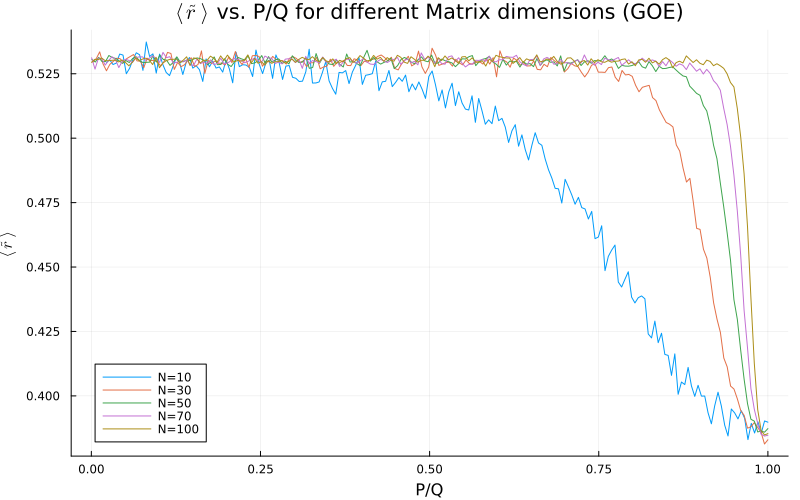

In [58]:
plot()
for i in 1:2:length(data)-1
    p=n[div((i+1),2)]
    plot!(data[i], data[i+1], label = "N=$p")
end
display(plot!(title=L"$\langle\tilde r \ \rangle$"*" vs. P/Q for different Matrix dimensions (GOE)", xlabel = "P/Q", ylabel =L"$\langle\tilde r \ \rangle$" ,size=(800,500)))

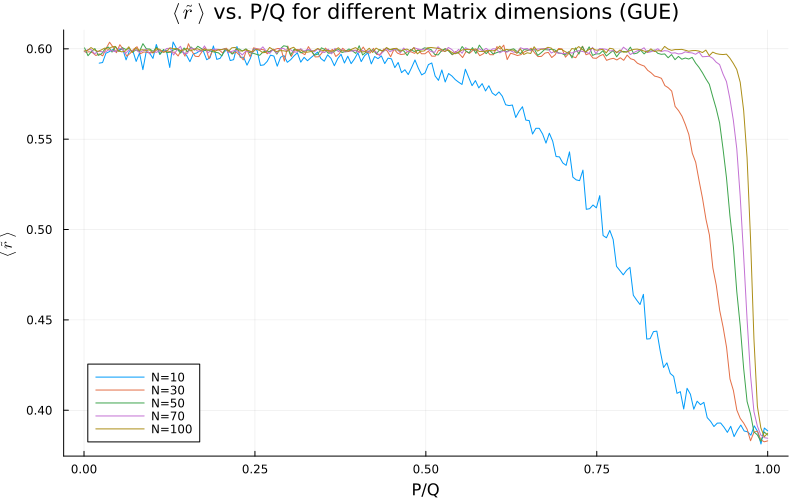

In [63]:
plot()
for i in 1:2:length(data)-1
    p=n[div((i+1),2)]
    plot!(data1[i], data1[i+1], label = "N=$p")
end
display(plot!(title=L"$\langle\tilde r \ \rangle$"*" vs. P/Q for different Matrix dimensions (GUE)", xlabel = "P/Q", ylabel =L"$\langle\tilde r \ \rangle$" ,size=(800,500)))

As we see, in both the cases of GOE and GUE, $\langle \tilde r \rangle $ initially starts from 0.53 and 0.6 respectively, stays constant for a range of P/Q, then gradually drops to 0.38. The interesting thing is that as we increase the dimension of the matrix, the drop to 0.38 becomes steeper. For N=100, $\langle \tilde r \rangle $ stays almost equal to 0.53 and 0.6 for the entire range and steeply drops to 0.38. Thus, as we increase the dimension of the matrix, the GOE/GUE property of the matrix becomes robust.

We will now scale the functions with the dimension of matrix N, so that every plot overlaps on each other. Using an empirical approach, we found that to properly scale, we have to invert the x-axis and then scale the x-axis by $x \longrightarrow (1-x)\times N/\pi$ for all x for a specific dimension N. We set the x-axis to logscale for proper visualisation

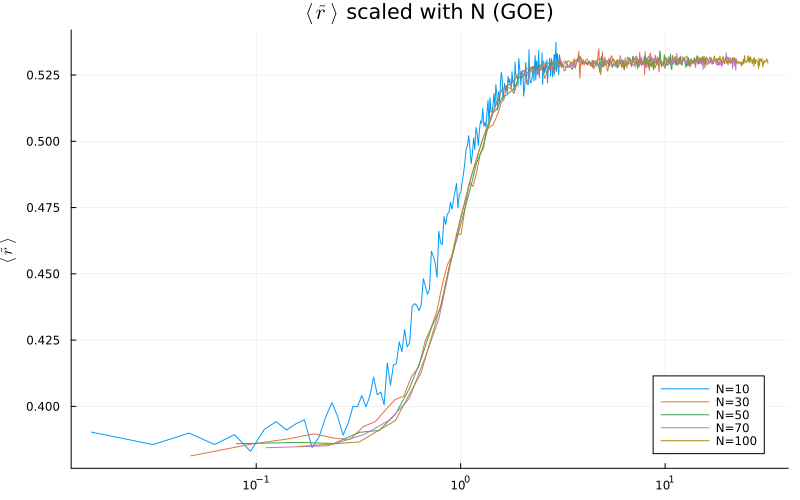

In [93]:
plot()
for i in 1:2:length(data)-1
    p=n[div((i+1),2)]
    rescale_x= (abs.(1 .- data[i])*(p/pi))[1:199]
    n_data= data[i+1][1:199]
    plot!(rescale_x, n_data, label = "N=$p", xscale=:log10)
end
display(plot!(title=L"$\langle\tilde r \ \rangle$"*" scaled with N (GOE)", ylabel =L"$\langle\tilde r \ \rangle$" ,size=(800,500)))

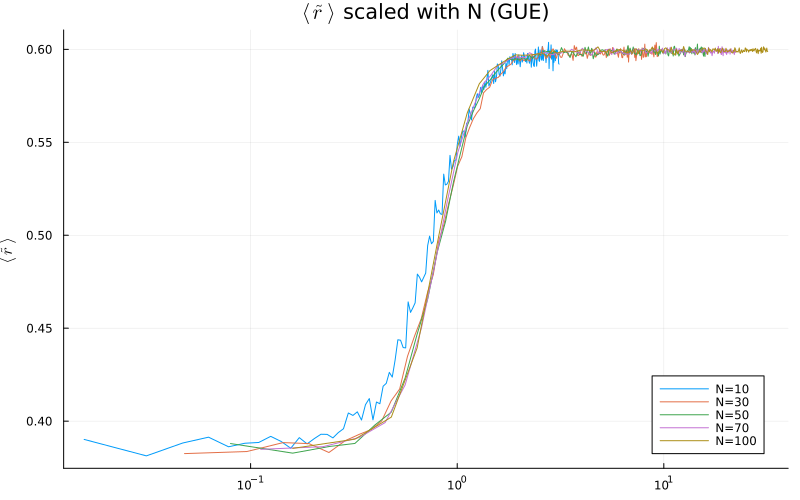

In [95]:
plot()
for i in 1:2:length(data1)-1
    p=n[div((i+1),2)]
    rescale_x= (abs.(1 .- data1[i])*(p/pi))[1:199]
    n_data= data1[i+1][1:199]
    plot!(rescale_x, n_data, label = "N=$p", xscale=:log10)
end
display(plot!(title=L"$\langle\tilde r \ \rangle$"*" scaled with N (GUE)", ylabel =L"$\langle\tilde r \ \rangle$" ,size=(800,500)))